# ЦПТ и распределение Лапласа

In [164]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline

In [165]:
a=1.0 # альфа
b=0.0 # бетта

In [166]:
lap_rv = stats.laplace()
set_lap = lap_rv.rvs(size=1000) # выборка объема 1000

отображаем теоретическую плотность для распределения Лапласа и гистограмму.

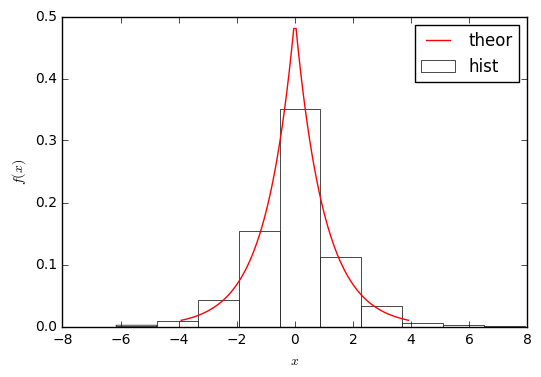

In [184]:
x = np.linspace(lap_rv.ppf(0.01), lap_rv.ppf(0.99),100)
pdf = lap_rv.pdf(x) #  плотность распределения
cdf = lap_rv.cdf(x) # функция распределения

plt.plot(x, pdf, label='theor',c='r', alpha=a)
plt.hist(set_lap,normed=True,lw=0.5, color='w',label='hist')

plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

определяем значения математического ожидания (мю) и среднеквадратического отклонения (сигма) для  alpha=1.0 и betta=0.0

In [183]:
EX = b # математическое ожидание
DX =2/(a**2) # дисперсия DX=sigm^2
print 'математическое ожидание', EX 
print 'дисперсия', DX
print 'среднеквадратическое отклонение', sqrt(DX)

математическое ожидание 0.0
дисперсия 2.0
среднеквадратическое отклонение 1.41421356237


Функция для генерации 1000 выборок и нахождения выборочных средних.

In [177]:
def clt_lap(pattern,size,n=1000):
    d = []
    for i in range(n):
        sample = pattern[np.random.randint(0,len(pattern),size)]
        d.append(np.mean(sample))
        
    mu = np.mean(d) # выборочное среднее
    sigma = np.std(d,ddof=1) # выборочное отклонение
    dev_norm = sqrt(DX/(size)) # среднеквадратическое отклонение нормы
    
    norm_rv = stats.norm(loc=EX,scale=dev_norm)
    
    print 'Теоретическое среднее / Выборочное среднее : {:.3f} / {:.3f}'.format(EX,mu)
    print 'Среднеквадратическое отклонение нормального распр. /  Выборочное отклонение : {:.3f} / {:.3f}'.format(dev_norm,sigma)
        
    plt.hist(d,normed=True,lw=0.5, label='vyboro4nye')
    plt.plot(x,norm_rv.pdf(x), label='normal')
    plt.legend()
    
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

При n = 5

Теоретическое среднее / Выборочное среднее : 0.000 / 0.003
Среднеквадратическое отклонение нормального распр. /  Выборочное отклонение : 0.632 / 0.665


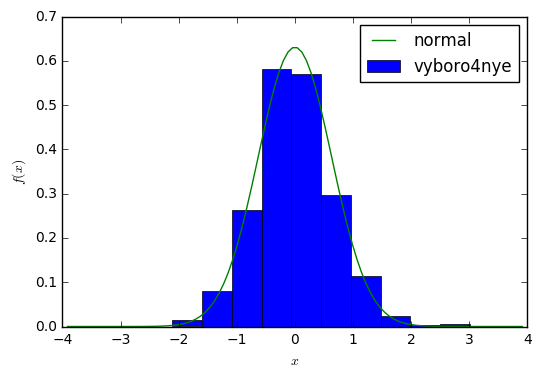

In [178]:
clt_lap(set_lap,5)

При n = 10

Теоретическое среднее / Выборочное среднее : 0.000 / 0.015
Среднеквадратическое отклонение нормального распр. /  Выборочное отклонение : 0.447 / 0.463


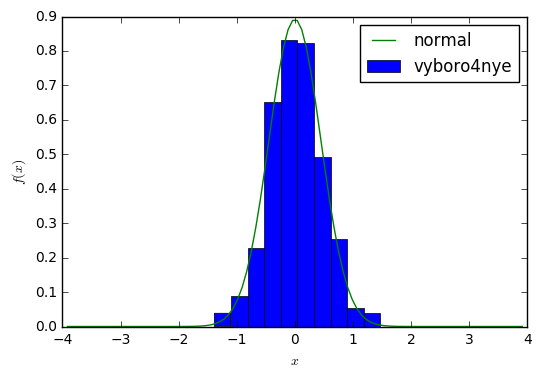

In [179]:
clt_lap(set_lap,10)

При n = 50

Теоретическое среднее / Выборочное среднее : 0.000 / 0.012
Среднеквадратическое отклонение нормального распр. /  Выборочное отклонение : 0.200 / 0.203


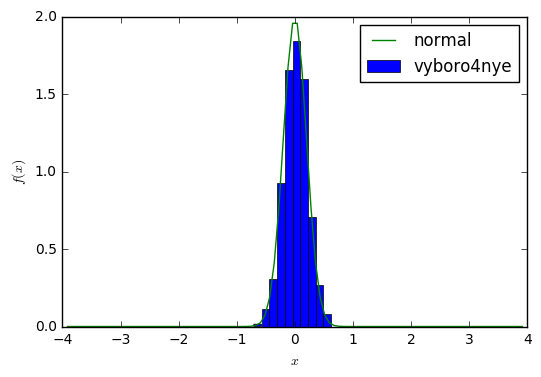

In [180]:
clt_lap(set_lap,50)

Даже при минимальном объеме выборочное среднее хорошо приближено к теоретическому.
Увеличение объема выборки сглаживает распределение выборочных средних, что означает увеличение точности аппроксимации. 
При n=50 распределение максимально похоже на нормальное, что подтверждает работоспособность ЦПТ для распределения Лапласа.
С ростом n сужается доверительный интервал